In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['winequalityN.csv']


In [2]:
data = pd.read_csv("../input/winequalityN.csv")

In [3]:
data.info()
data = data.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6487 non-null float64
volatile acidity        6489 non-null float64
citric acid             6494 non-null float64
residual sugar          6495 non-null float64
chlorides               6495 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6488 non-null float64
sulphates               6493 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 659.9+ KB


In [4]:
print("data shape :", data.shape)

data shape : (6463, 13)


In [5]:
categoricals = data.select_dtypes(include='object').columns
numericals = data.select_dtypes(exclude='object').columns
print(f'{len(categoricals)} categorical features')
print(f'{len(numericals)} numerical features')

1 categorical features
12 numerical features


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6d17ff1780>,
      dtype=object)

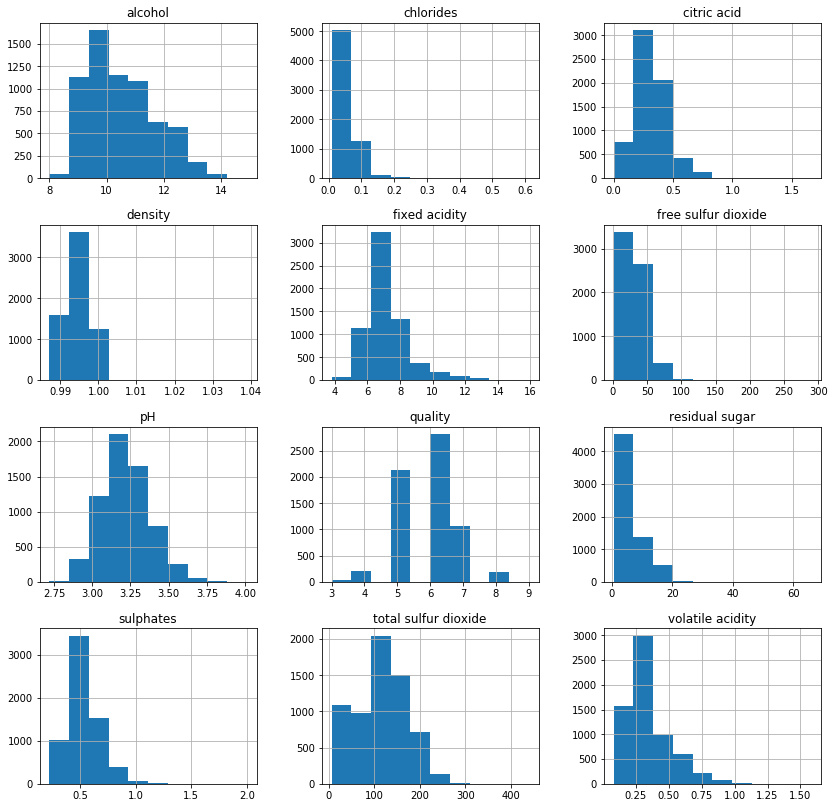

In [6]:
import matplotlib.pyplot as plt
data[(data.dtypes[(data.dtypes == "float")|
                              (data.dtypes == "int64")].index.values)].hist(figsize=[14,14])

In [7]:
y = data.quality
X = data.drop("quality", axis = 1)

In [8]:
X = pd.get_dummies(X)
X = X.drop("type_red", axis = 1)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [10]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y= train_test_split(X, y, test_size = 0.25)

In [11]:
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=1000)
my_model.fit(train_X, train_y, 
             early_stopping_rounds=5, 
             eval_set=[(test_X, test_y)], 
             verbose=False)

/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:18:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [12]:
from sklearn.metrics import mean_absolute_error
predictions = my_model.predict(test_X)
predictions = np.rint(predictions)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, test_y)))

Mean Absolute Error: 0.463490099009901


In [13]:
result = pd.DataFrame({ "predictions" : predictions})

In [14]:
result

,predictions
0,5.0
1,5.0
2,5.0
3,6.0
4,6.0
5,7.0
6,6.0
7,6.0
8,6.0
9,6.0
